In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-anxiety-and-depression-dataset/dataset.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print("pandas=="+pd.__version__)
print("numpy=="+pd.__version__)
print("matplotlib=="+pd.__version__)
print("seaborn=="+pd.__version__)
print("skleran=="+pd.__version__)

pandas==1.5.3
numpy==1.5.3
matplotlib==1.5.3
seaborn==1.5.3
skleran==1.5.3


In [4]:
data = pd.read_excel('../input/students-anxiety-and-depression-dataset/dataset.xlsx')
data.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [5]:
data=data.dropna(how='any')

In [6]:
X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [7]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [8]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

Accuracy of the model: 0.988
Precision Score of the model: 0.992
Recall Score of the model: 0.89


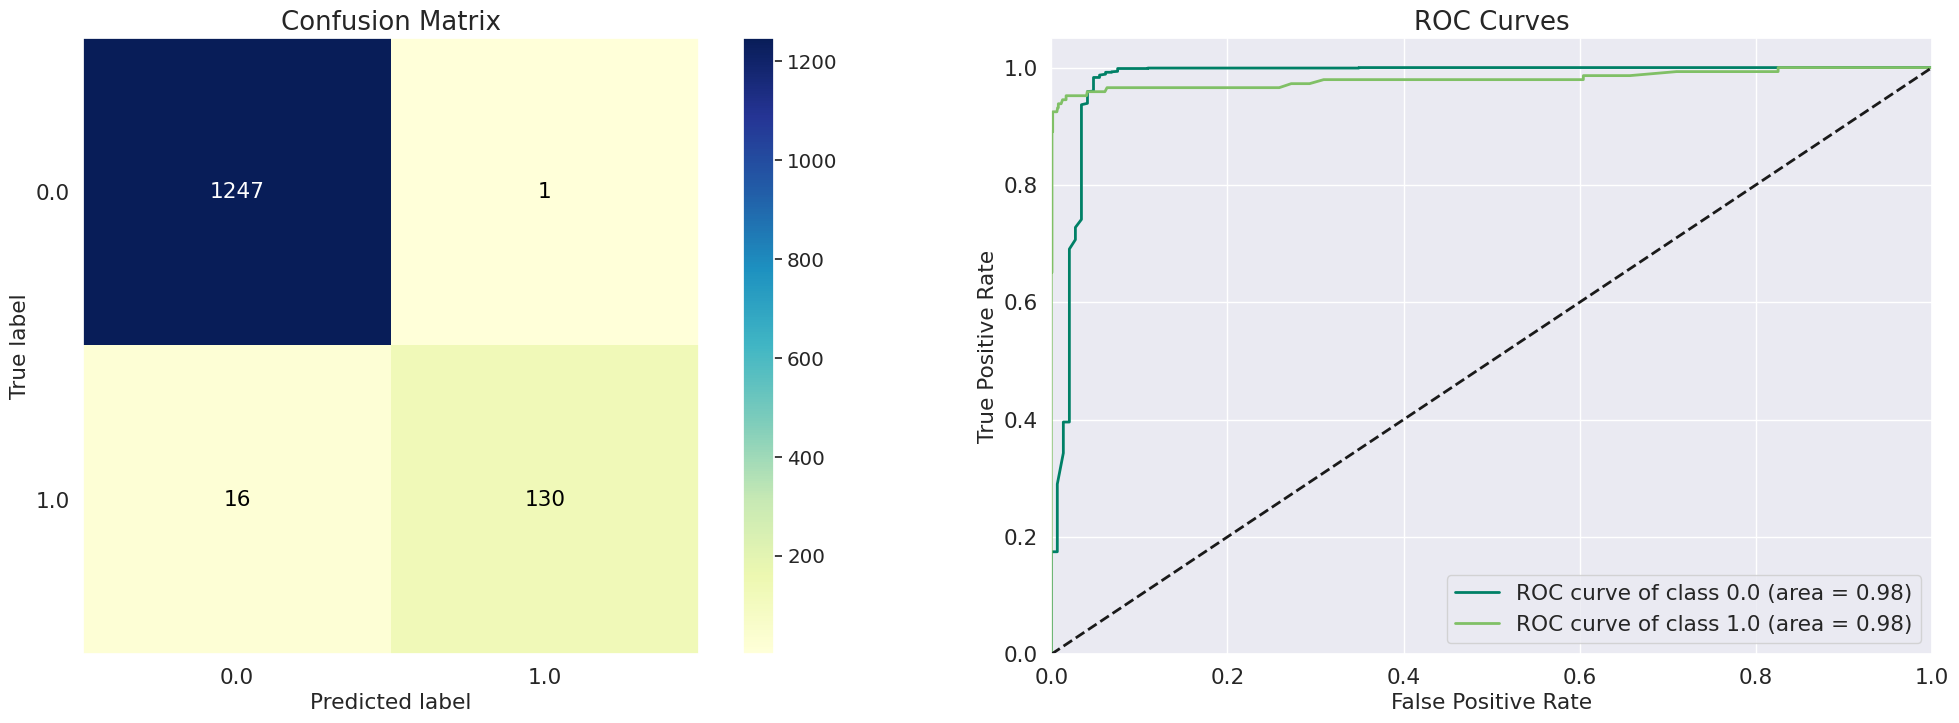

In [9]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

In [10]:
ex1 = "I was so excited but feel loneliness"

In [11]:
ex1=tfidf.transform([ex1]).toarray()

In [12]:
rf.predict_proba(ex1)

array([[0.83333333, 0.16666667]])

In [13]:
rf.predict(ex1)

array([0.])

In [14]:
ex2 = "I can not sleep well and worry all the day"

In [15]:
ex2=tfidf.transform([ex2]).toarray()

In [16]:
rf.predict_proba(ex2)

array([[0.39, 0.61]])

In [17]:
rf.predict(ex2)

array([1.])